# Predicting salary based on level position

Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset

In [14]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [6]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
y.shape

(10, 1)

In [19]:
y.reshape(-1,)

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

SVR Model

In [20]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y.reshape(-1,))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Predicting

In [21]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [24]:
y_pred

array([170370.0204065])

Visualization

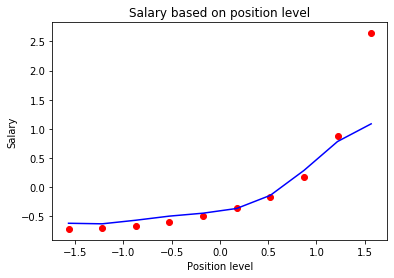

In [23]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Salary based on position level')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()